In [1]:
from google.colab import drive
drive.mount('/content/drive') #, force_remount=True)

Mounted at /content/drive


In [2]:
imgsz = 800
epoch_num = 10
batch = 16
initial_model_name = "yolov8s"

In [3]:
import os
from datetime import datetime

drive_folder = "/content/drive/MyDrive/trabajo_final_CEIA/train_models"

model_name = "yolov8"

# drive_folder = "drive/MyDrive/trabajo final CEIA/train models/yolov8/"

# Get the current timestamp
# timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Create a folder with the timestamp as its name
# folder_name = f"run_{timestamp}"
folder_name = f"model_{initial_model_name}_imgsz_{imgsz}_epochs_{epoch_num}_batch_{batch}"
os.makedirs(drive_folder + "/" + model_name + "/" + folder_name)

print(f"Folder '{folder_name}' created.")

Folder 'model_yolov8s_imgsz_800_epochs_10_batch_16' created.


In [4]:
%cd {drive_folder + "/" + model_name + "/" + folder_name}

/content/drive/MyDrive/trabajo_final_CEIA/train_models/yolov8/model_yolov8s_imgsz_800_epochs_10_batch_16


In [5]:
dataset_location = drive_folder + "/datasets/" + model_name
dataset_location

'/content/drive/MyDrive/trabajo_final_CEIA/train_models/datasets/yolov8'

In [6]:
!ls {dataset_location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [7]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/trabajo_final_CEIA/train_models/yolov8/model_yolov8s_imgsz_800_epochs_10_batch_16


In [8]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.122 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [9]:
from ultralytics import YOLO

from IPython.display import display, Image

In [10]:
!yolo cfg

Printing '/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/default.yaml'

task: detect
mode: train
model: null
data: null
epochs: 100
patience: 50
batch: 16
imgsz: 640
save: true
save_period: -1
cache: false
device: null
workers: 8
project: null
name: null
exist_ok: false
pretrained: true
optimizer: auto
verbose: true
seed: 0
deterministic: true
single_cls: false
rect: false
cos_lr: false
close_mosaic: 0
resume: false
amp: true
fraction: 1.0
profile: false
overlap_mask: true
mask_ratio: 4
dropout: 0.0
val: true
split: val
save_json: false
save_hybrid: false
conf: null
iou: 0.7
max_det: 300
half: false
dnn: false
plots: true
source: null
show: false
save_txt: false
save_conf: false
save_crop: false
show_labels: true
show_conf: true
vid_stride: 1
line_width: null
visualize: false
augment: false
agnostic_nms: false
classes: null
retina_masks: false
boxes: true
format: torchscript
keras: false
optimize: false
int8: false
dynamic: false
simplify: false
opset: null
workspace: 4
n

In [11]:
!cat {dataset_location}/data.yaml

names:
- knife
- pistol
nc: 2
roboflow:
  license: Public Domain
  project: weapons-h9w1e
  url: https://universe.roboflow.com/threatdetection/weapons-h9w1e/dataset/3
  version: 3
  workspace: threatdetection
test: ../test/images
train: /content/drive/MyDrive/trabajo_final_CEIA/train_models/datasets/yolov8/train/images
val: /content/drive/MyDrive/trabajo_final_CEIA/train_models/datasets/yolov8/valid/images


In [14]:
%cd {HOME}

!yolo task=detect mode=train model={initial_model_name}.pt data={dataset_location}/data.yaml epochs={epoch_num} imgsz={imgsz} plots=True save_period={int(epoch_num/2)} batch={batch}

/content/drive/MyDrive/trabajo_final_CEIA/train_models/yolov8/model_yolov8s_imgsz_800_epochs_10_batch_16
Ultralytics YOLOv8.0.122 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/trabajo_final_CEIA/train_models/datasets/yolov8/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=5, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualiz

/content/drive/MyDrive/trabajo_final_CEIA/train_models/yolov8/model_yolov8s_imgsz_800_epochs_10_batch_16


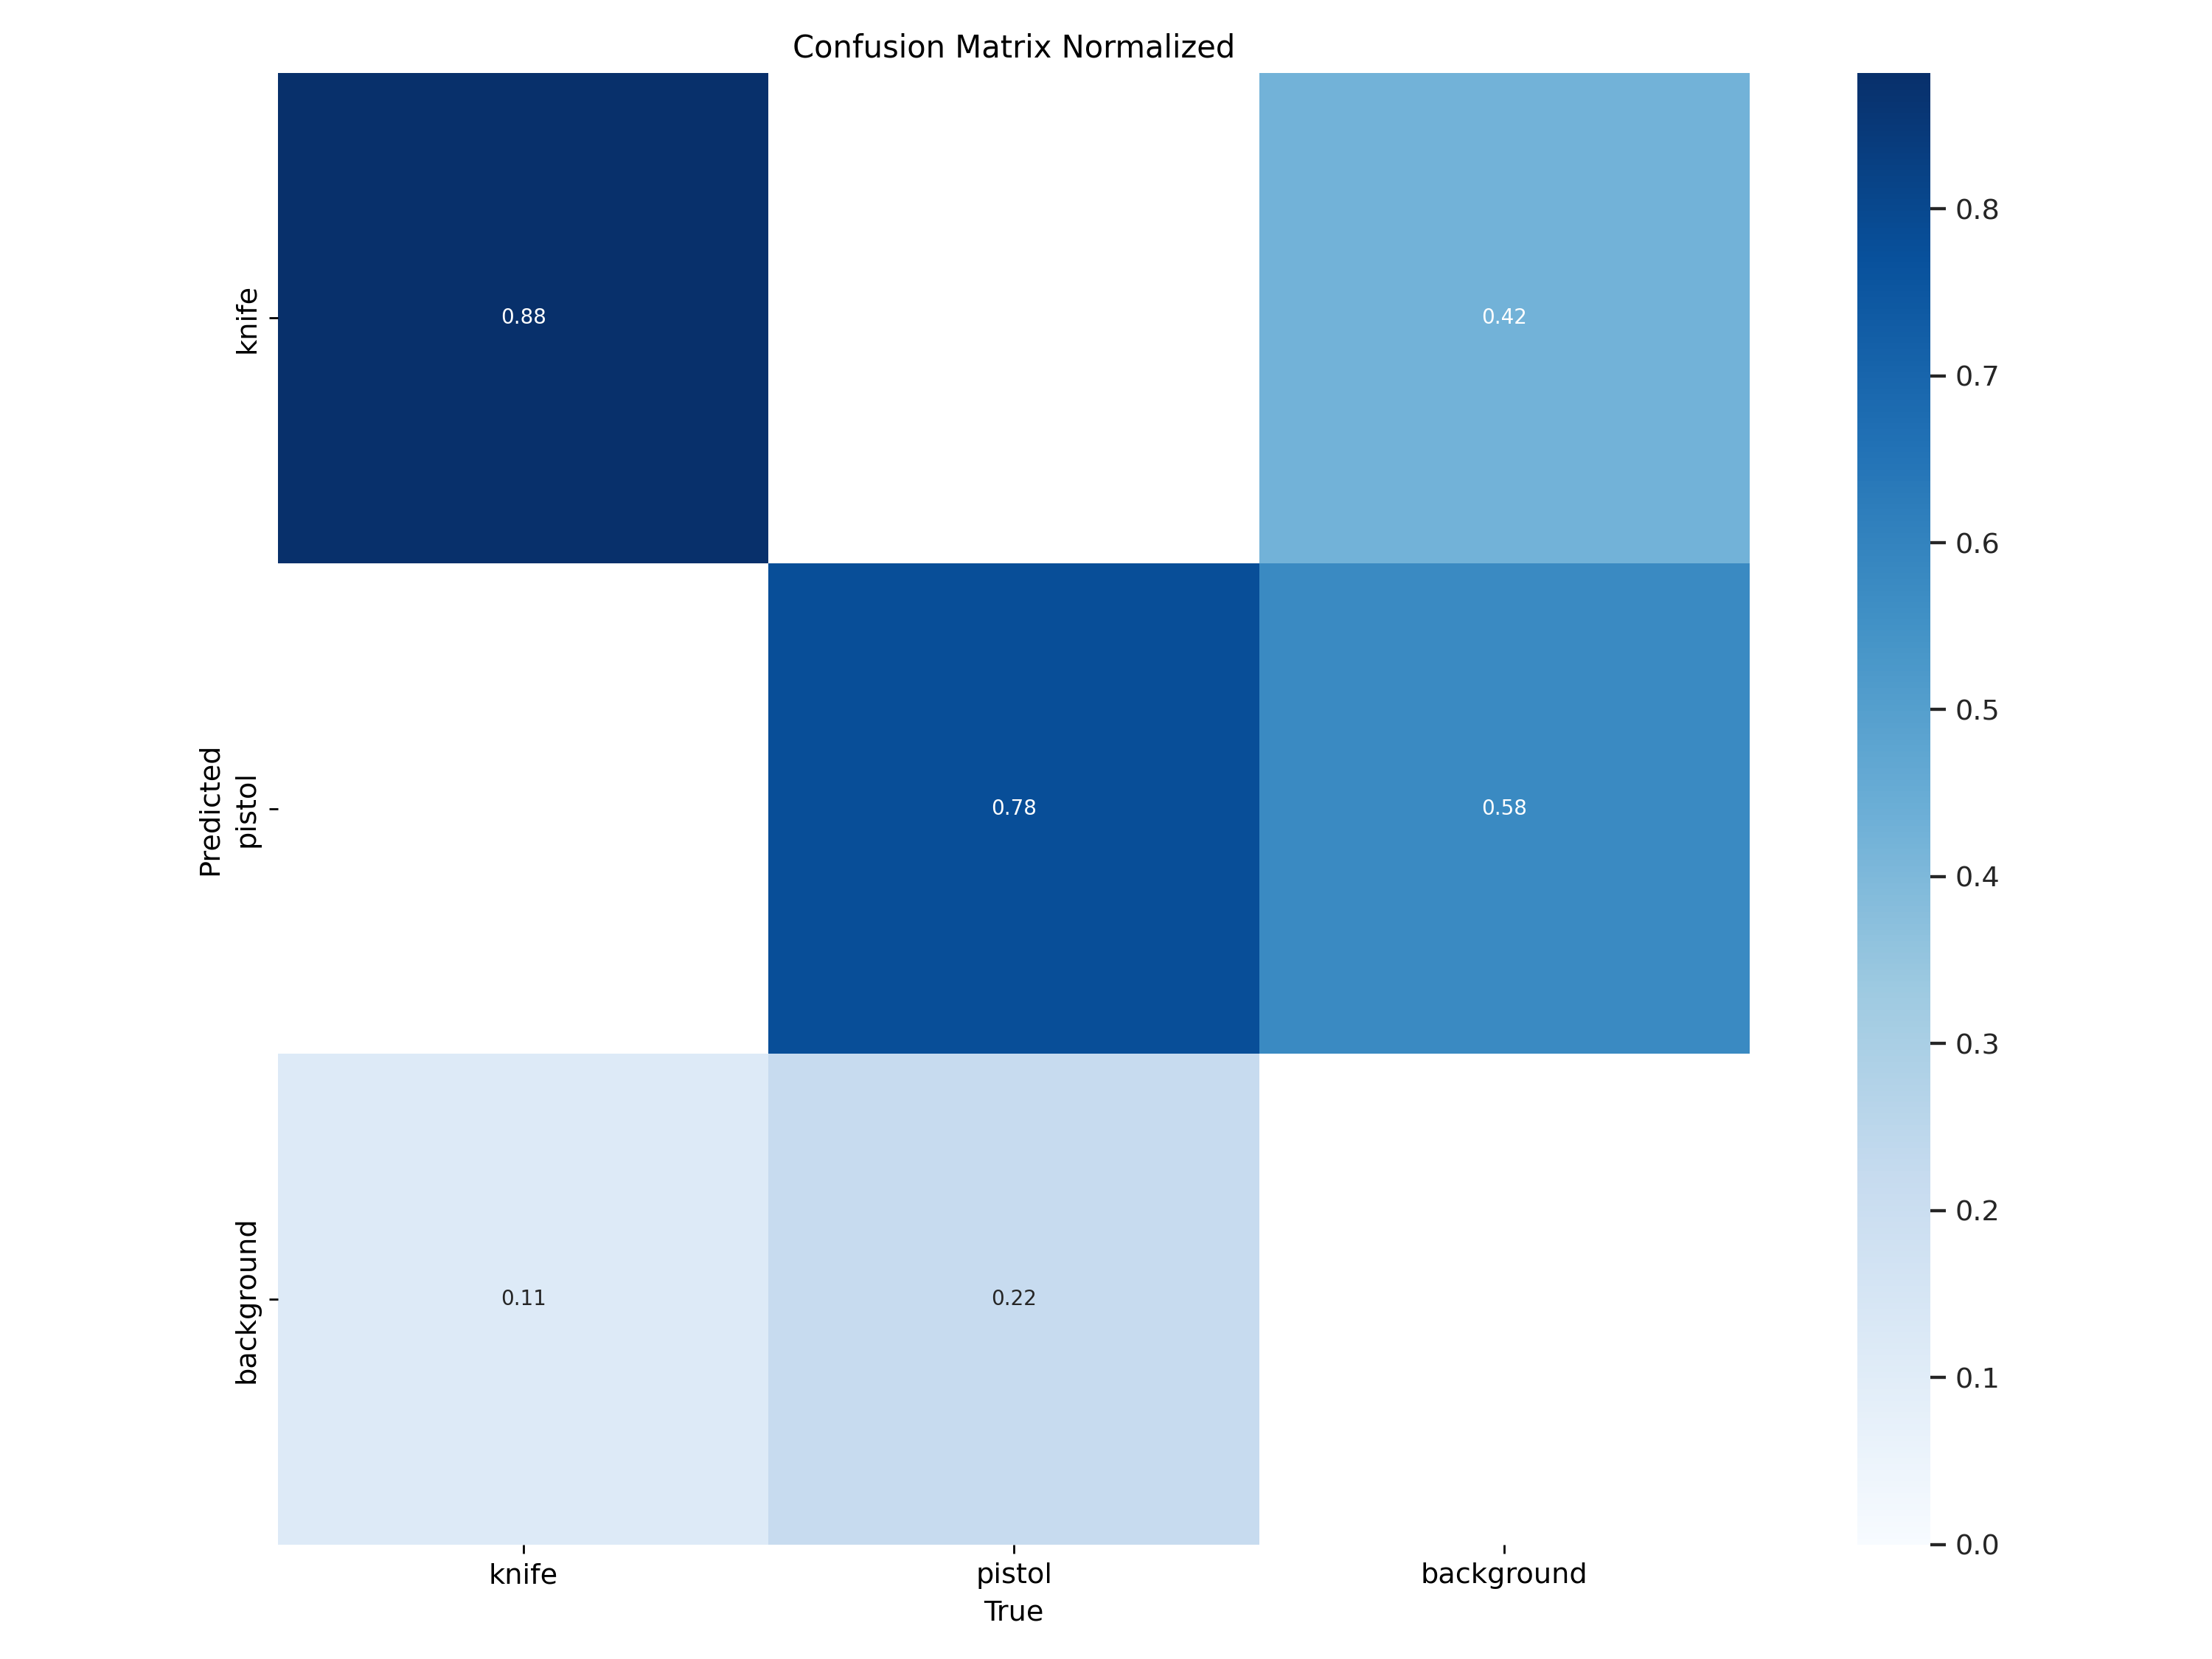

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)

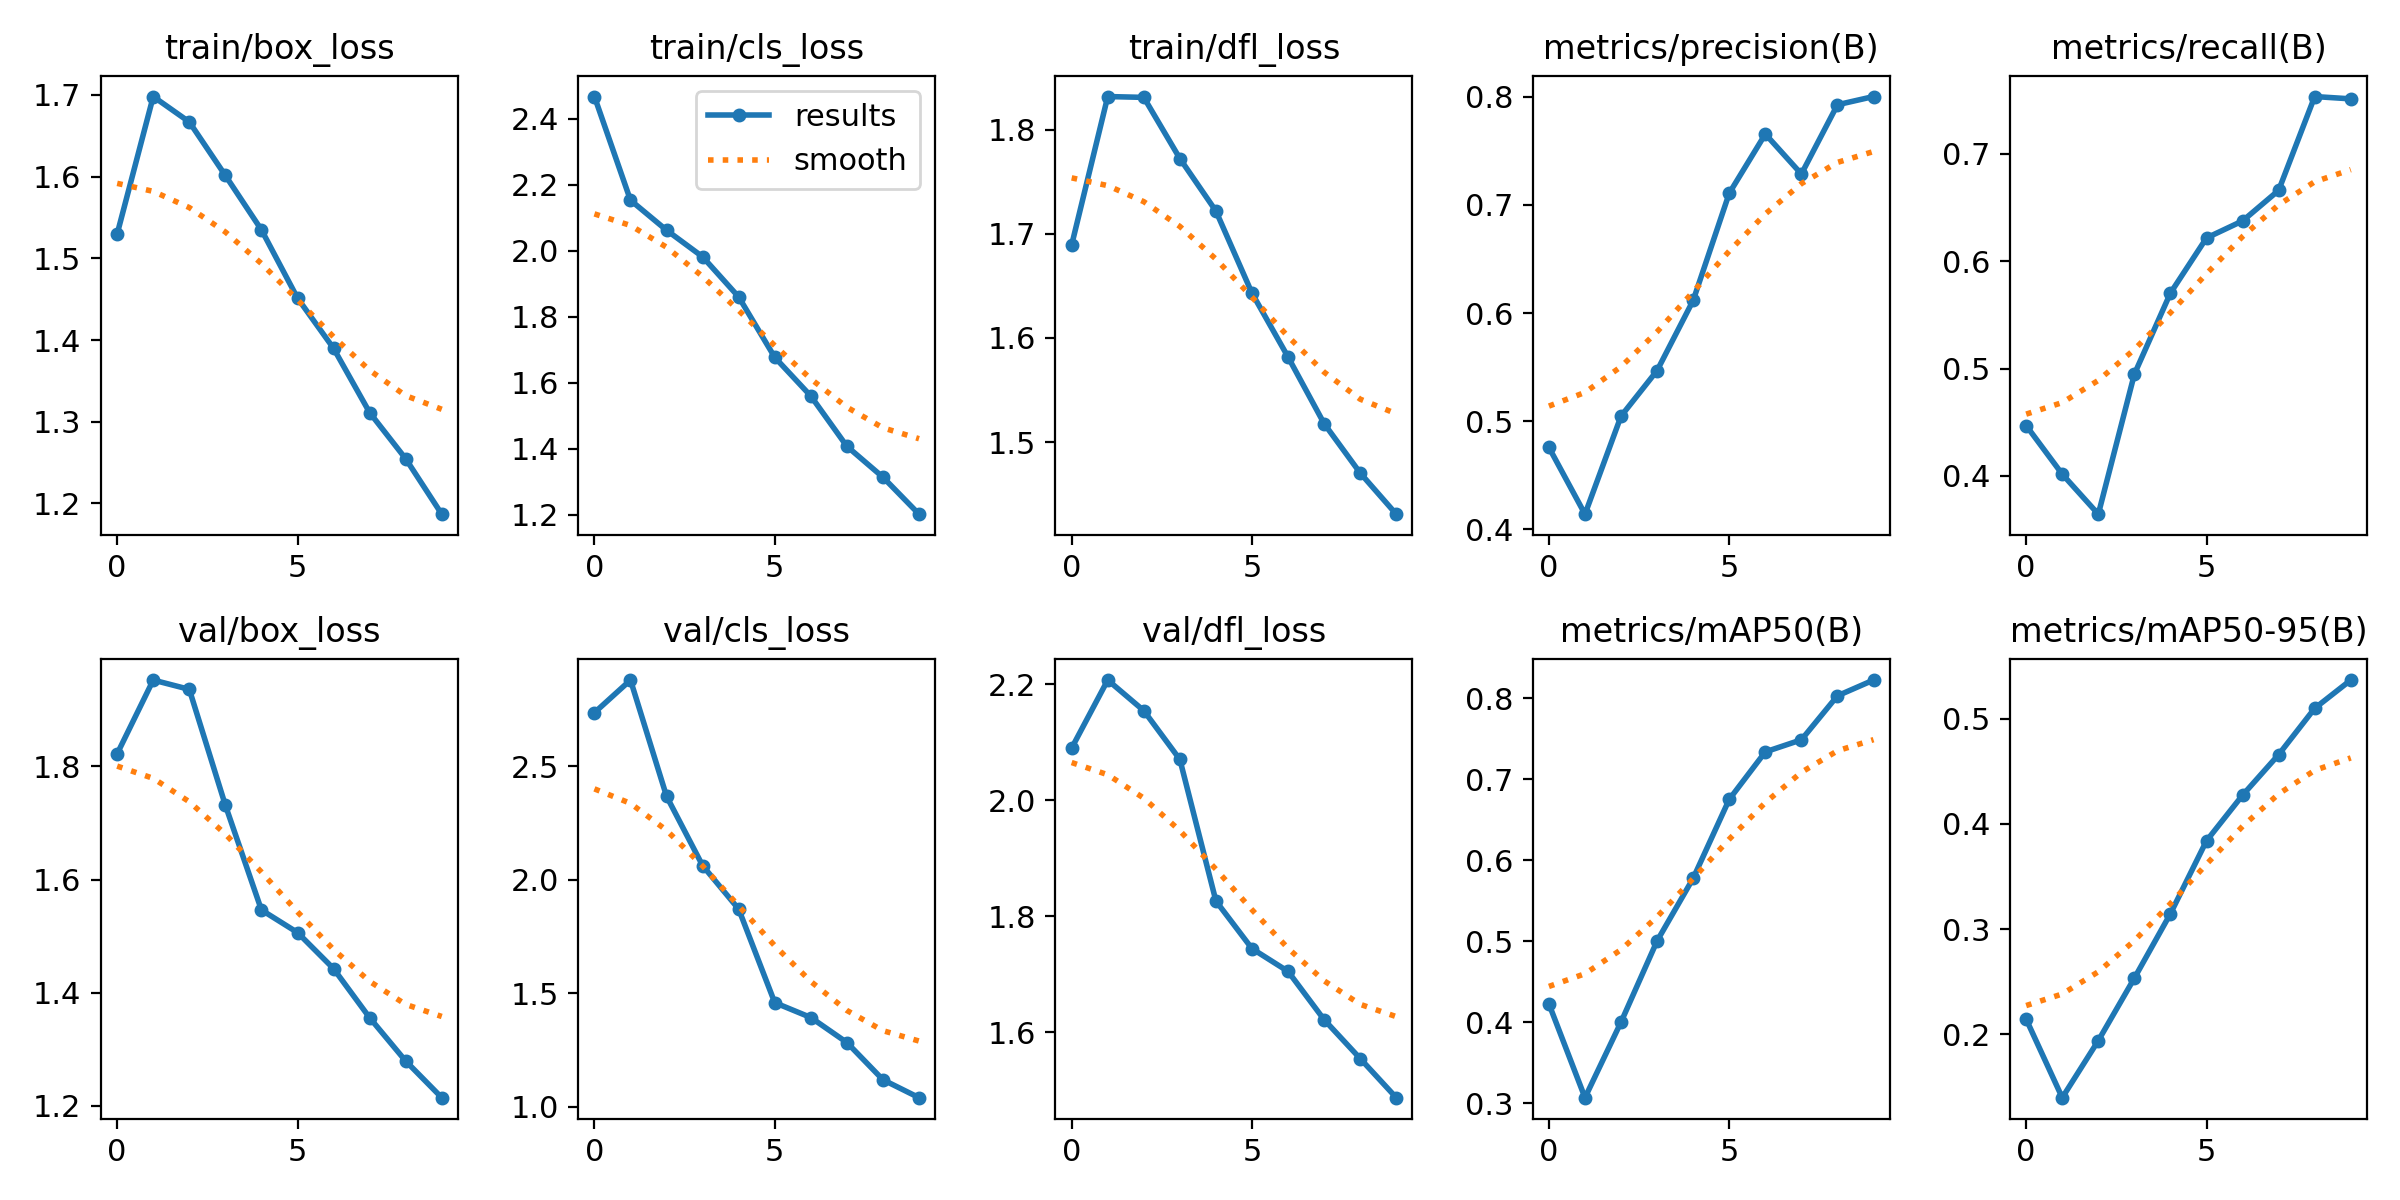

In [22]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/drive/MyDrive/trabajo_final_CEIA/train_models/yolov8/model_yolov8s_imgsz_800_epochs_10_batch_16


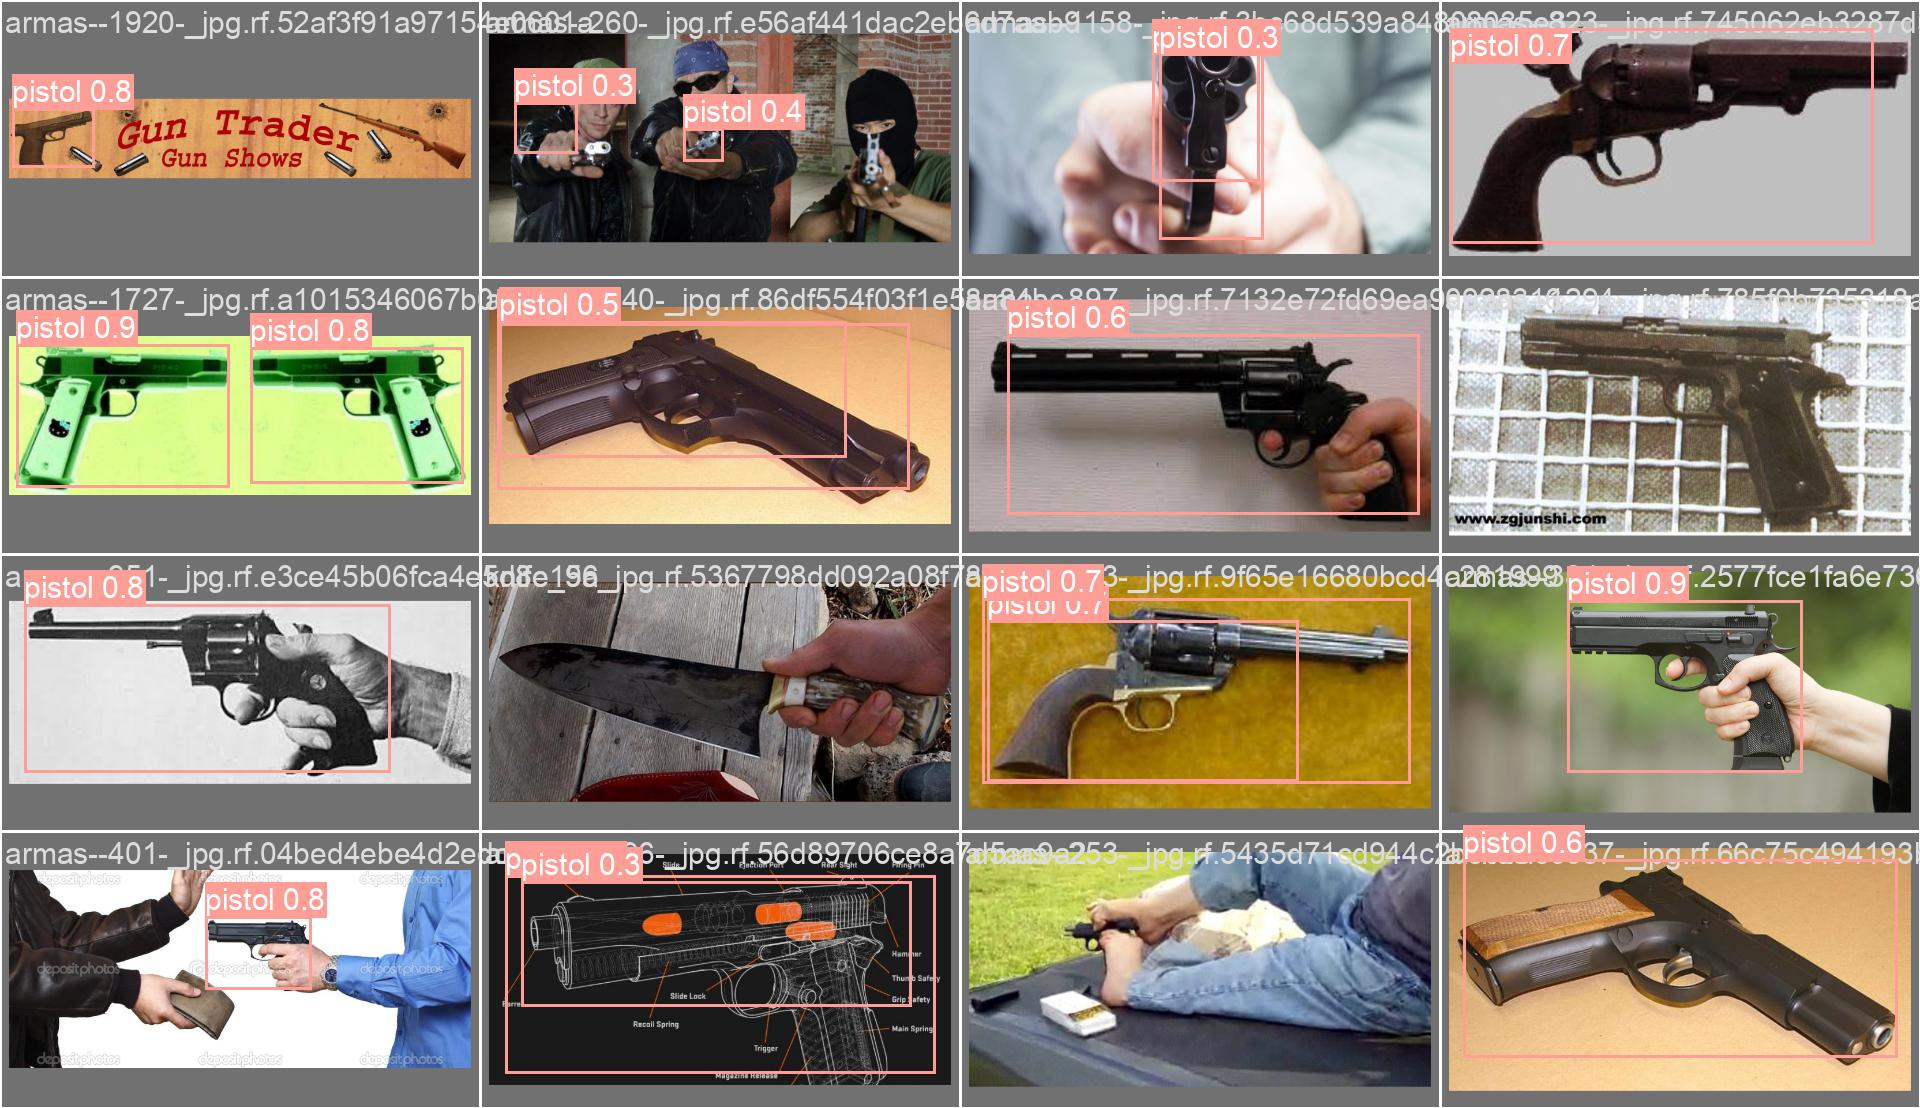

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [24]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset_location}/data.yaml

/content/drive/MyDrive/trabajo_final_CEIA/train_models/yolov8/model_yolov8s_imgsz_800_epochs_10_batch_16
Ultralytics YOLOv8.0.122 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/trabajo_final_CEIA/train_models/datasets/yolov8/valid/labels.cache... 813 images, 47 backgrounds, 0 corrupt: 100% 813/813 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 51/51 [00:24<00:00,  2.11it/s]
                   all        813        830      0.807      0.754      0.822      0.536
                 knife        813        413      0.869      0.816       0.91      0.599
                pistol        813        417      0.745      0.692      0.734      0.474
Speed: 0.9ms preprocess, 10.0ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val


In [25]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset_location}/test/images save=True

/content/drive/MyDrive/trabajo_final_CEIA/train_models/yolov8/model_yolov8s_imgsz_800_epochs_10_batch_16
Ultralytics YOLOv8.0.122 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/408 /content/drive/MyDrive/trabajo_final_CEIA/train_models/datasets/yolov8/test/images/DSC_00071_JPG.rf.49faa4a4af3305567f7ab7707565e898.jpg: 544x800 2 knifes, 60.1ms
image 2/408 /content/drive/MyDrive/trabajo_final_CEIA/train_models/datasets/yolov8/test/images/DSC_00101_JPG.rf.3542e667133eaeeb706d3f0e2d19be8d.jpg: 544x800 2 knifes, 17.6ms
image 3/408 /content/drive/MyDrive/trabajo_final_CEIA/train_models/datasets/yolov8/test/images/DSC_0015_JPG.rf.c42462a1843e979c8a058efbec628342.jpg: 544x800 1 knife, 2 pistols, 17.6ms
image 4/408 /content/drive/MyDrive/trabajo_final_CEIA/train_models/datasets/yolov8/test/images/DSC_00211_JPG.rf.9b19bbad80ff779ab9b11d2b6e330b0b.jpg: 544x800 1 knife, 17.6ms
image 5/408 /content/drive/MyD

AttributeError: ignored

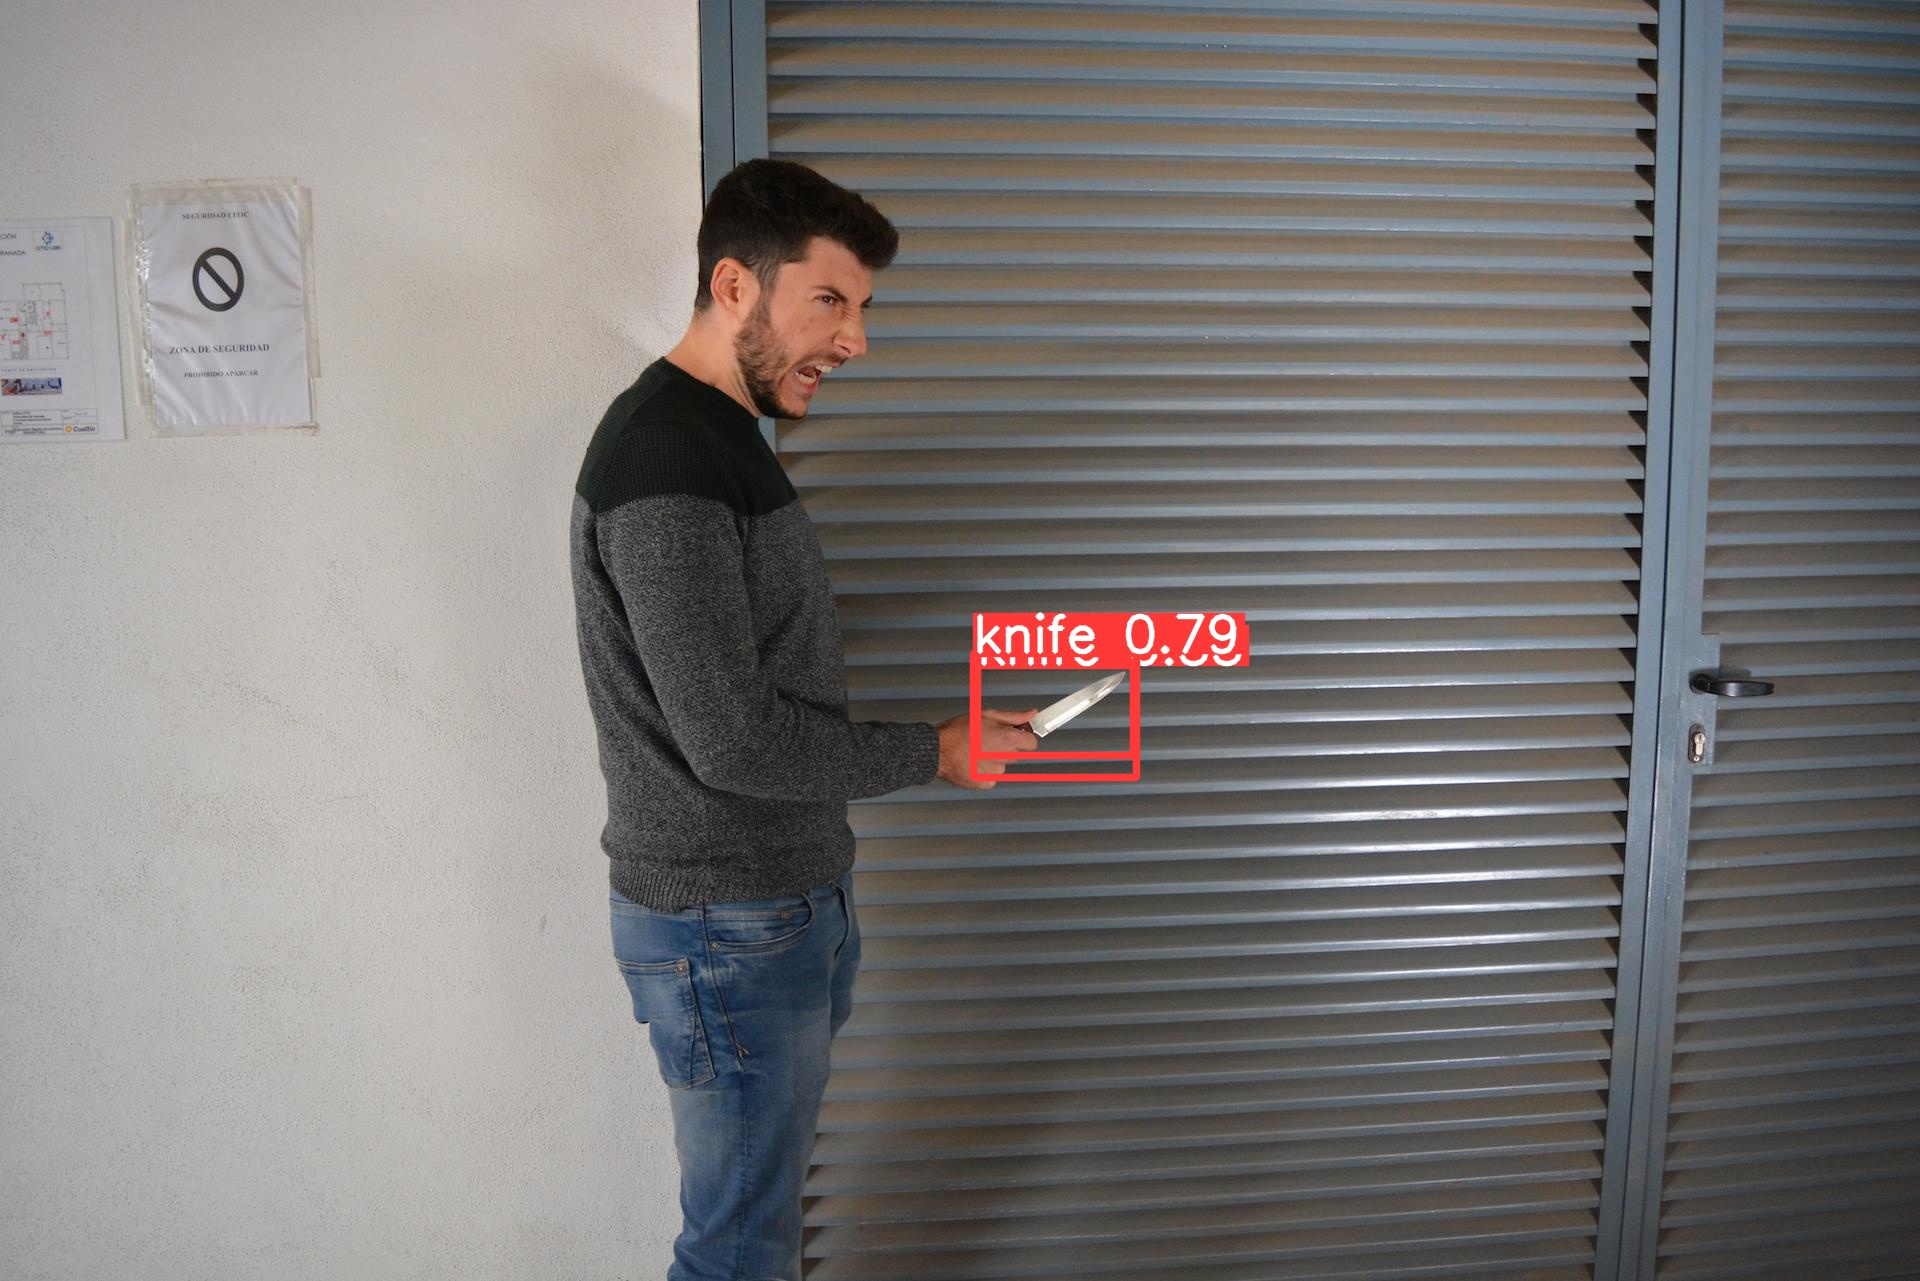

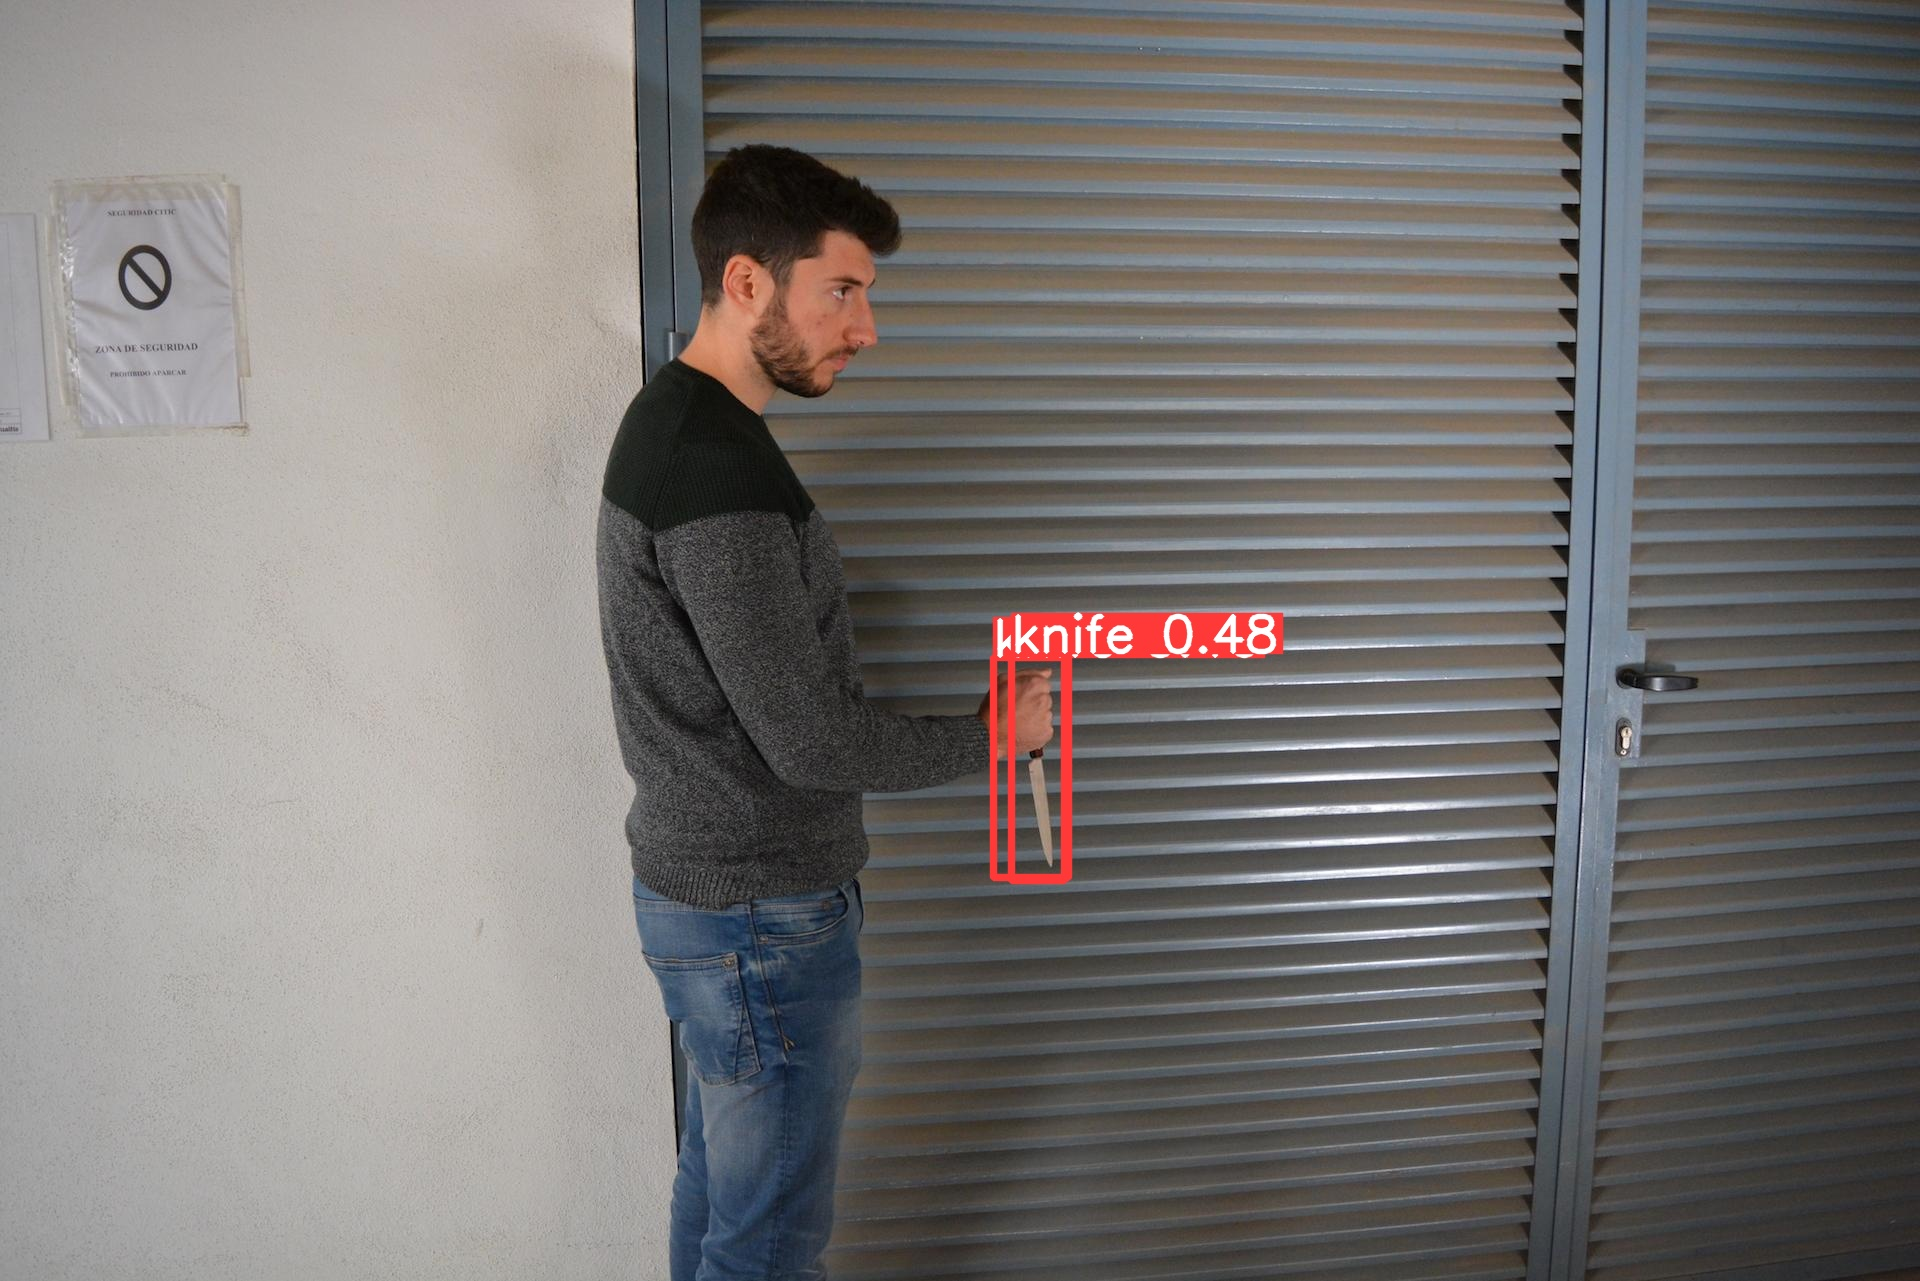

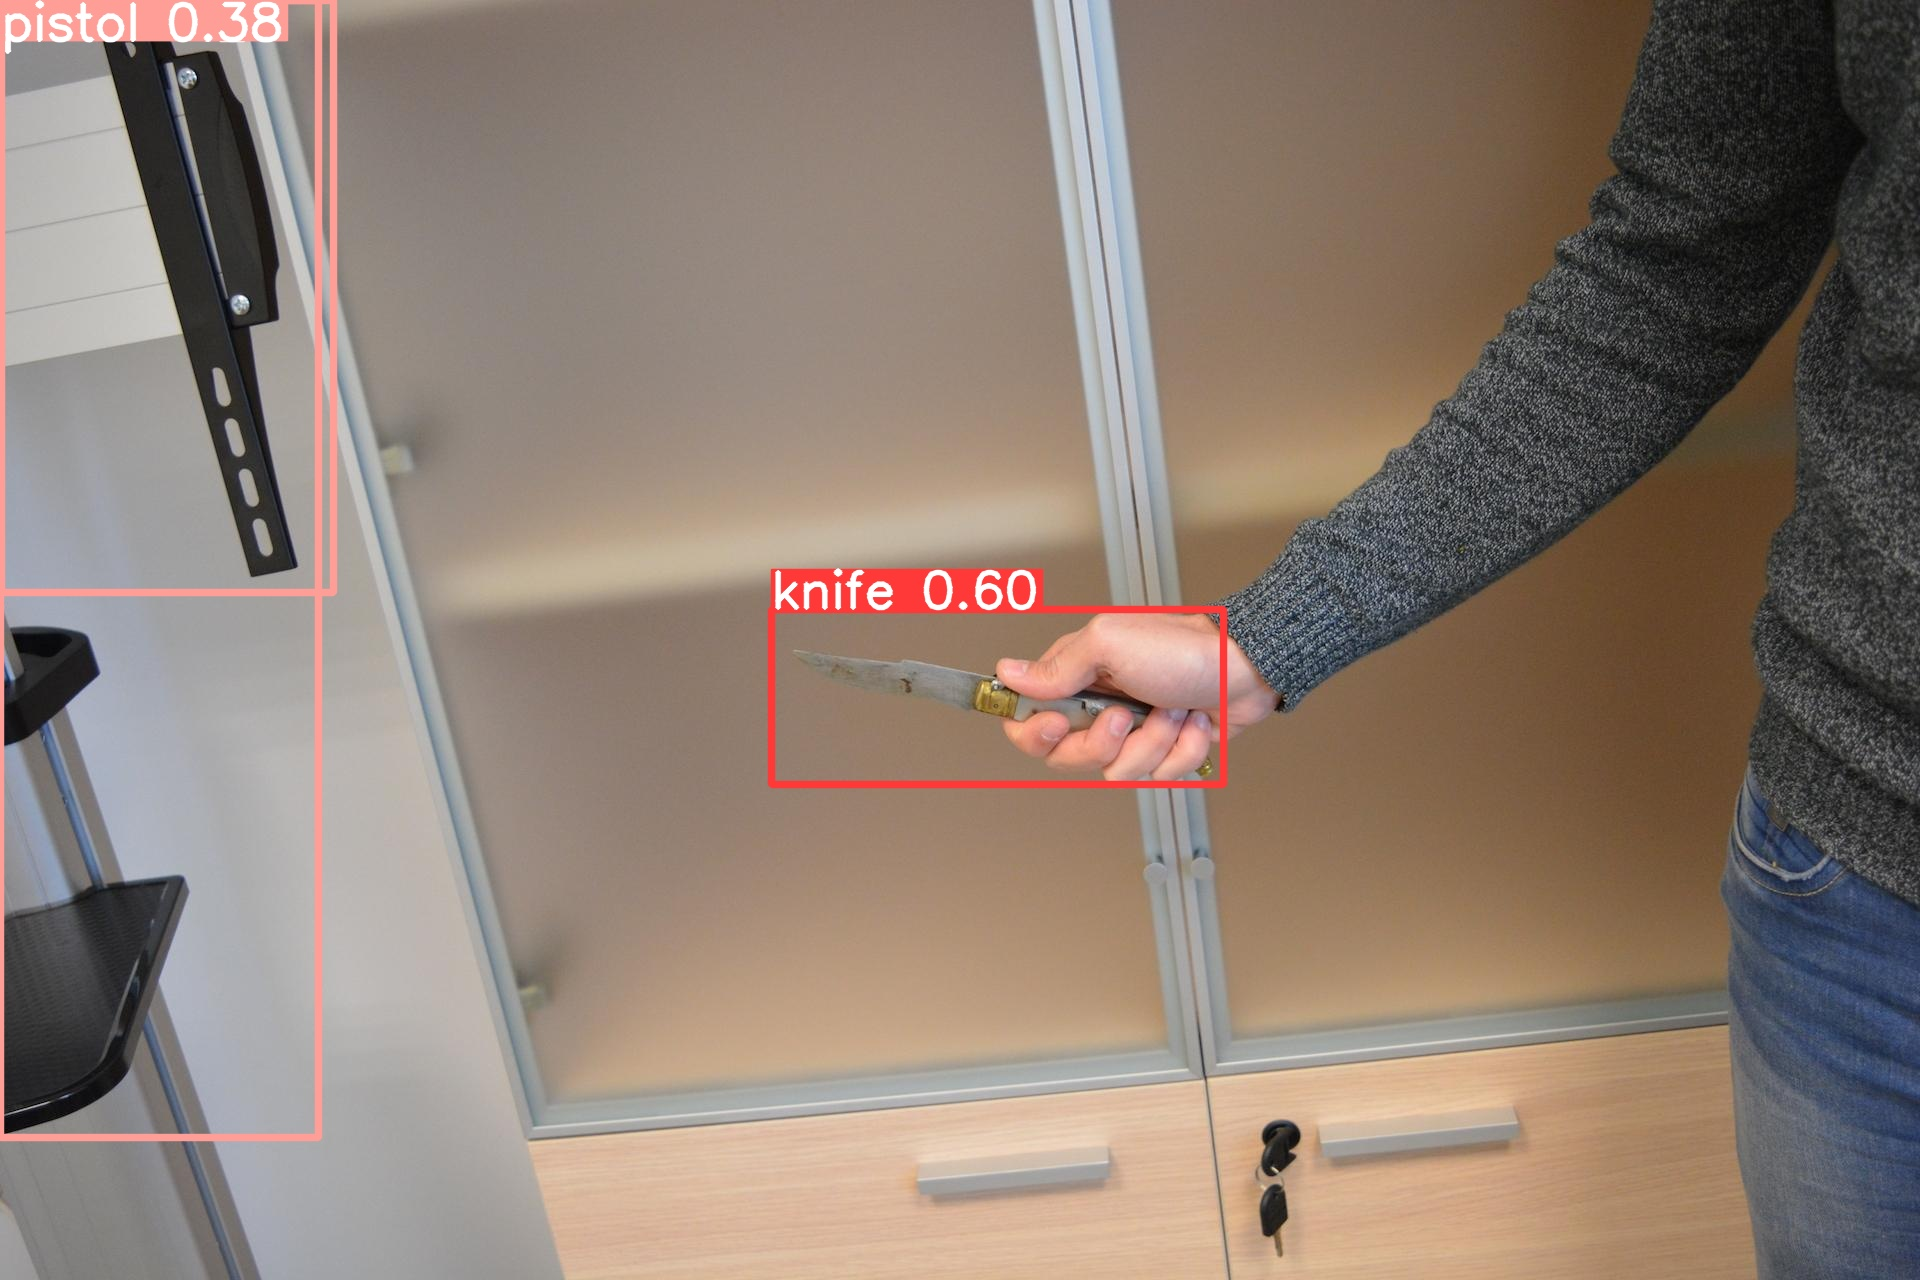

In [26]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
    display(Image(filename=image_path, width=400))
    print("\n")